## TensorFlow:
TensorFlow is the most popular and adopted free and open-source deep learning library. It was first developed and maintained by Google. It can be used for both research and production.

## **TensorFlow benefits:**
- Highly efficient
- Cross-platform (works on IOS, Android, Unix, Windows, in the cloud, in the browser etc etc)
- Calculates gradients automatically (this is truly useful for Neural Networks, where the analytical solution of gradients would be VERY tedious to derive).
* Deep integration with the Keras library (Functional approach, as well as high-level wrapper)

# General notebook setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Install TensorFlow 2.0

TensorFlow 2.x is a major change from TensorFlow 1.x (not backwards compatible, however you can use a tool to convert your TensorFlow 1.x code to 2.x).

The new version is designed to be more pythonic. It's  easier to debug models, extract values during training (because of the need of sessions and graphs in TensorFlow 1.x). 

TensorFlow 2.x supports eager execution by default, so you don't need a session and to evaluate operations / tensors in order to extract values.

In [2]:
#!pip install tensorflow
# or for GPU version:
# !pip install tensorflow-gpu

# Import TensorFlow

In [2]:
# Canonical way of importing TensorFlow
import tensorflow as tf

# If this doesn't work TensorFlow is not installed correctly

# TensorFlow 2.0
At the time of the update of this notebook we are still in the early days of TensorFlow, and currently (Oct 22) the version 2.0.0 has just been released.

In [3]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

# should be tensorflow 2

'2.0.0'

# Intro to TensorFlow
### Core components:

#### 1. Tensor
A Tensor in TensorFlow is an N-dimensional array (just like Numpys array object). Tensors are multilinear maps from vector spaces to real numbers. Scalars, vectors and matrices are all tensors. The Tensor represents units of data in TensorFlow.

Numpy arrays or Pandas DataFrames sent to Tensorflow functions are automatically converted into TensorFlow tensors.

#### 2. Operations / Ops
TensorFlow operations or ops are units / edges / nodes of computation (e.g. matrix multiplication, addition, etc.)

#### 3. Computation Graph
The computational graph is is an optimized, compiled representation of the dataflow and the order of computations that are sent to an execution environment (for example during model training).

TensforFlow 2.x supports eager execution, but when we build a model and then train it TensorFlow can compile the model and optimize the executions as a computational graph object. This is done by decorating a function with `@tf.function`.

This computational graph is then  sent to another instance / runtime environment (e.g. on a CPU or GPU) for execution. The results are sent back to us. This makes TensorFlow computations highly distributable and it also allows us to automatically evaluate all gradients in the computation nodes.

![](imgs/tf_graph.png)

TensorFlow 2.x supports eager execution by default.

In [4]:
tf.executing_eagerly() 

True

# TensorBoard setup
Tip2: Setup TensorBoard if you want to monitor and analyze computational graphs etc.

In [5]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "{}/r{}/".format(log_dir, t)

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [6]:
logdir

'/Users/anuj/tf_logs/r20200308053414/'

# 1. TensorFlow tensors

## 1.1 tf.constant

Constants are initialized directly and eager execution let's us see the values without creating a session and running the tensor.

In [7]:
a = tf.constant(2)
b = tf.constant(5)

In [9]:
a # note the numpy value

<tf.Tensor: id=0, shape=(), dtype=int32, numpy=2>

In [10]:
a.numpy()

2

The .numpy() method will return the result as a numpy array.

In [10]:
# Eager evaluation of tensors
a.numpy()

2

### We can also perform operations on tensors

In [11]:
a*b

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=10>

#### or the same with universal functions

In [15]:
tf.multiply(a, b)

<tf.Tensor: id=5, shape=(), dtype=int32, numpy=10>

In [20]:
t = tf.constant(np.arange(25).reshape(5, 5), name="mymat")

In [22]:
a_matrix = tf.constant([[1,2], [3,4]])
b_matrix = tf.constant([[5,6], [7,8]])
b_matrix

<tf.Tensor: id=11, shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [24]:
a_matrix

<tf.Tensor: id=10, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [25]:
b_matrix

<tf.Tensor: id=11, shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [23]:
tf.matmul(a_matrix, b_matrix)

<tf.Tensor: id=12, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

##### Note, we cannot reassign values of constants (like we can with Variables).

In [26]:
a.assign(8)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## 1.2 tf.Variable

Variables are mutable and can be updated and reassigned new values. Variables are usually weights and biases of a model that are optimized during training, they also indicate the degrees of freedom of the model (what model parameters that can change, thus making the model flexible).

In [28]:
var = tf.Variable(3.)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [29]:
# Reassign the value of a Variable
var.assign(4)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [30]:
var.numpy()

4.0

In [31]:
# we can also create multi dim Variables.
d = tf.Variable(np.random.randn(3, 1)) #reshape
# automatically assings data type
d #

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[-0.02032073],
       [ 0.48532804],
       [ 1.08254443]])>

In [41]:
k = tf.Variable(5)

In [42]:
j = k

In [43]:
k = k+1

In [45]:
j

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [22]:
# inplace increase / decrease Variable values

var.assign(10)
print('original value:', var.numpy())
print('add 1:', var.assign_add(1.).numpy())
print('subtract 5:', var.assign_sub(5.).numpy())

original value: 10.0
add 1: 11.0
subtract 5: 6.0


### Variables also have a lot of attributes associated with them:

In [23]:
v = tf.Variable([[3.,3.2], [1.2,2.2]], dtype=tf.float32, name='my_variable')

print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  my_variable:0
type  :  <dtype: 'float32'>
shape :  (2, 2)
device:  /job:localhost/replica:0/task:0/device:CPU:0


<div class='alert alert-info'><b>Note</b>: Tensorflow is really similar to NumPy, and you can think of the tensors as an ndimensional array.</div>


![tf_to_np](imgs/tf_to_np.png)
Source: CS227d, NLP, Stanford

# 2. Operations / Ops
Operations can be carried out directly or assigned to variables.

In [24]:
op1 = tf.add(a,b)
op1

<tf.Tensor: id=43, shape=(), dtype=int32, numpy=7>

In [25]:
a+b # same as tf.add

<tf.Tensor: id=44, shape=(), dtype=int32, numpy=7>

In [26]:
v = a+b
u = v+2
w = v*u
z = w*3
z

<tf.Tensor: id=50, shape=(), dtype=int32, numpy=189>

In [50]:
np.add(3, 5)

8

## Look at the computational graph with @tf.function

`@tf.function` is a very useful module that can be used to convert simple python functions into a highly optimized computational graph that can be run on any runtime environment. When we build a model and then train it TensorFlow we can compile the model and optimize the executions.

In [51]:
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z = tf.multiply(a, b, name='z')
    with tf.name_scope('second'):
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
    return(w1+w2)

In [52]:
# Setup a writer to save graph information and TensorFlow logs
# To be displayed with Tensorboard

# writer = tf.summary.create_file_writer(logdir)
# tf.summary.trace_on()

In [53]:
a = tf.constant(3)
b = tf.constant(4)
func(5, 6)

<tf.Tensor: id=100, shape=(), dtype=int32, numpy=67>

In [54]:
logdir

'/Users/anuj/tf_logs/r20200308053414/'

In [55]:
from tensorboard import program
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch()

In [56]:
url

'http://localhost:6007/'

# Calculate gradients

Gradient evaluation is very importnat machine learning because it is based on function optimization. You can use `tf.GradientTape()` method to record the gradient of an arbitrary function

In [76]:
def op(w):
    k = tf.constant(5, dtype=tf.float32)
    square_w = (w * w) + k
    another = square_w * square_w
    return another

# Gradient scope for the function w^2
for i in range(10):
    with tf.GradientTape() as tape:
        w = tf.Variable(i, dtype=tf.float32)
        another = op(w)
        grad = tape.gradient(another, w)
        print(grad.numpy())

0.0
24.0
72.0
168.0
336.0
600.0
984.0
1512.0
2208.0
3096.0


### Gradient of the Sigmoid function
In this example we evaluate the gradient of the sigmoid function 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Note that 

$$\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$

For instance 

$$\sigma'(0) = \sigma(0)(1-\sigma(0)) = \frac{1}{2}\left(1-\frac{1}{2} \right) = \frac{1}{4}$$

In [37]:
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

In [38]:
#define a varaible
x = tf.Variable(0.)

#record the gradient
with tf.GradientTape() as tape:
    sig = sigmoid(x)
    
res = tape.gradient(sig, x).numpy()
print('The gradient of the sigmoid function at 0.0 is ', res)

The gradient of the sigmoid function at 0.0 is  0.25


# Linear Regression in TensorFlow

This example is refactored from https://www.tensorflow.org/guide/eager. We create a complete example of using linear regression to predict the paramters of the function 

$$y = f(x) + noise = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $f(x)$. We train the model on 100 data pairs $(x,y)$. 

We want the model to learn a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient of the loss function with respect our model paramters.  

We use MSE to calcuate the loss 

$$MSE = \frac{1}{100} (y-\hat{y})^2$$

We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial MSE}{\partial W}$$

$$b = b - \alpha  \frac{\partial MSE}{\partial b}$$

In [77]:
from sklearn.datasets import make_regression

In [86]:
X, y = make_regression(n_samples=100, n_features=1, random_state=42, noise=5)
X = tf.constant(X.flatten())
y = tf.constant(y)

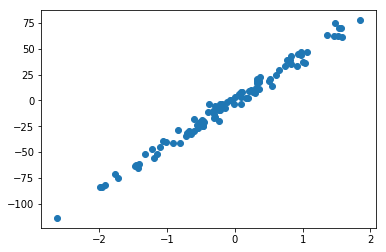

In [81]:
# #100 data points 
# NUM_EXAMPLES = 100

# #define inputs and outputs with some noise 
# X = tf.random.normal([NUM_EXAMPLES])  #inputs 
# noise = tf.random.normal([NUM_EXAMPLES]) #noise 
# y = X * 3 + 2 + noise  #true output

plt.scatter(X, y)

# Contruction Phase

In [40]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

In [41]:
#training info
train_steps = 300
learning_rate = 0.01

In [42]:

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [43]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 17.008
Loss at step 020: 7.591
Loss at step 040: 3.782
Loss at step 060: 2.230
Loss at step 080: 1.593
Loss at step 100: 1.329
Loss at step 120: 1.218
Loss at step 140: 1.170
Loss at step 160: 1.149
Loss at step 180: 1.140
Loss at step 200: 1.136
Loss at step 220: 1.134
Loss at step 240: 1.133
Loss at step 260: 1.133
Loss at step 280: 1.132
W : 3.165248394012451 , b  = 2.076061487197876 


In [44]:
loss = train_on_batch(X,y)
with writer.as_default():
        tf.summary.trace_export(
        name="linreg",
        step=0,
        profiler_outdir=logdir)

In [ ]:
!tensorboard --logdir $logdir

In [ ]:
plt.scatter(X, y)
plt.plot(X, b+W*X, color='red')